In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 6.1: Initial Loading and Inspection
# Load the dataset
file_path = '/content/students_adaptability_level_online_education.csv'
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Information:")
print(data.info())

print("\nFirst 5 Rows of the Dataset:")
print(data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB
None

First 5 Rows of the Dataset:
  Education Level Institution Type  Gender  Age  Device IT Student Location  \
0      University          Private    Male   23     Tab         No  

In [ ]:
# Step 6.1.2: Examining Variable Types and Structures
print("\nColumn Data Types:")
print(data.dtypes)

# Step 6.1.3: Investigating Distributions
print("\nStatistical Summary of Numerical Columns:")
print(data.describe())



Column Data Types:
Education Level        object
Institution Type       object
Gender                 object
Age                     int64
Device                 object
IT Student             object
Location               object
Financial Condition    object
Internet Type          object
Network Type           object
Flexibility Level      object
dtype: object

Statistical Summary of Numerical Columns:
               Age
count  1205.000000
mean     17.065560
std       5.830369
min       9.000000
25%      11.000000
50%      18.000000
75%      23.000000
max      27.000000


In [ ]:
print("\nValue Counts for Categorical Variables:")
for column in data.select_dtypes(include='object').columns:
    print(f"\n{column}:\n{data[column].value_counts()}")



Value Counts for Categorical Variables:

Education Level:
Education Level
School        530
University    456
College       219
Name: count, dtype: int64

Institution Type:
Institution Type
Private    823
Public     382
Name: count, dtype: int64

Gender:
Gender
Male      663
Female    542
Name: count, dtype: int64

Device:
Device
Mobile      1013
Computer     162
Tab           30
Name: count, dtype: int64

IT Student:
IT Student
No     901
Yes    304
Name: count, dtype: int64

Location:
Location
Town     935
Rural    270
Name: count, dtype: int64

Financial Condition:
Financial Condition
Mid     878
Poor    242
Rich     85
Name: count, dtype: int64

Internet Type:
Internet Type
Mobile Data    695
Wifi           510
Name: count, dtype: int64

Network Type:
Network Type
4G    775
3G    411
2G     19
Name: count, dtype: int64

Flexibility Level:
Flexibility Level
Moderate    625
Low         480
High        100
Name: count, dtype: int64


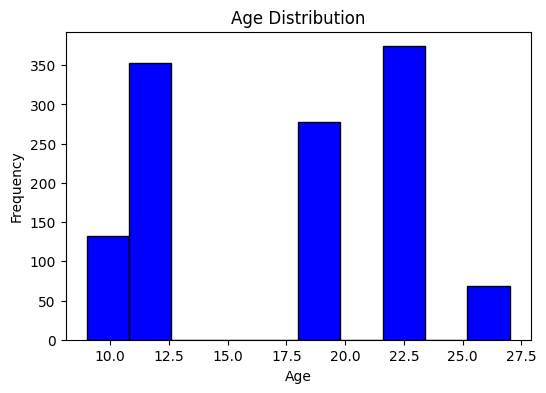

In [ ]:
# Visualizing distributions
data.hist(column='Age', bins=10, grid=False, color='blue', edgecolor='black', figsize=(6, 4))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Step 6.1.4: Identifying Measurement Levels
# Listing variable types and their roles
categorical_columns = data.select_dtypes(include='object').columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['Education Level', 'Institution Type', 'Gender', 'Device', 'IT Student', 'Location', 'Financial Condition', 'Internet Type', 'Network Type', 'Flexibility Level']
Numerical Columns: ['Age']


In [ ]:
# Step 6.2: Data Cleaning
# Checking for missing or invalid values
print("\nChecking for Missing Values:")
print(data.isnull().sum())

# Standardizing categorical labels
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.str.strip().str.lower())

# Handling outliers for 'Age'
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
print("\nOutliers in Age Column:")
print(outliers)


Checking for Missing Values:
Education Level        0
Institution Type       0
Gender                 0
Age                    0
Device                 0
IT Student             0
Location               0
Financial Condition    0
Internet Type          0
Network Type           0
Flexibility Level      0
dtype: int64

Outliers in Age Column:
Empty DataFrame
Columns: [Education Level, Institution Type, Gender, Age, Device, IT Student, Location, Financial Condition, Internet Type, Network Type, Flexibility Level]
Index: []



Numerical Summaries:
               Age
count  1205.000000
mean     17.065560
std       5.830369
min       9.000000
25%      11.000000
50%      18.000000
75%      23.000000
max      27.000000


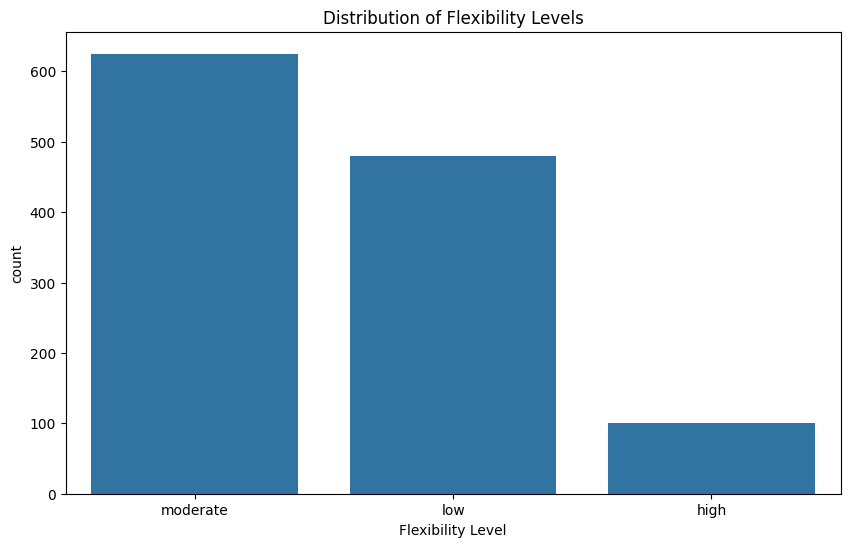

In [ ]:
# Step 6.3: Descriptive Analysis
# Numerical summaries
print("\nNumerical Summaries:")
print(data.describe())

# Graphical summaries
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Flexibility Level', order=data['Flexibility Level'].value_counts().index)
plt.title("Distribution of Flexibility Levels")
plt.show()


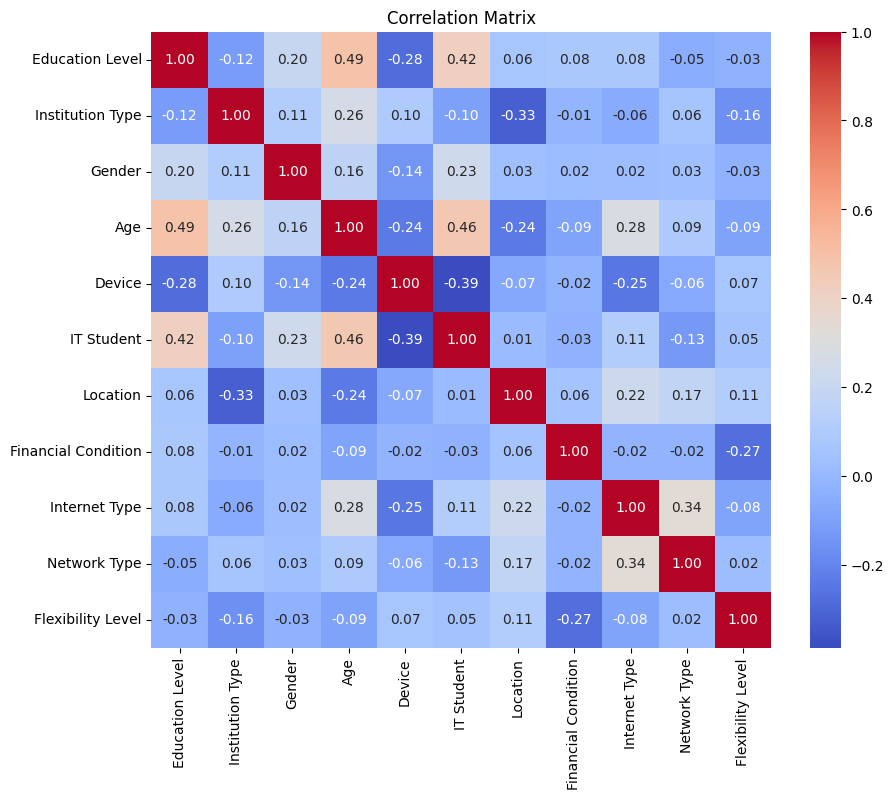

In [ ]:
# Additional Libraries for Advanced Analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

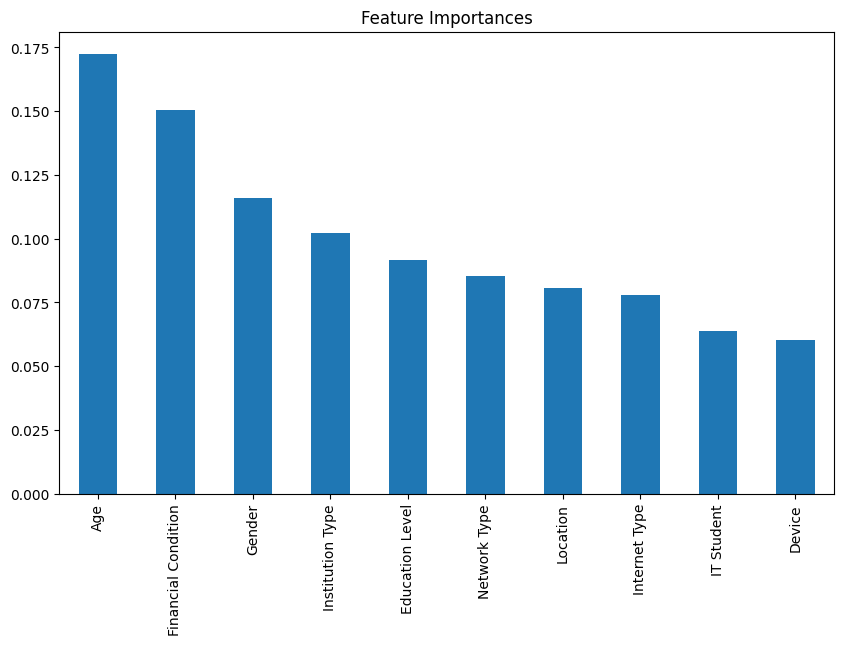

In [ ]:
# 2. Feature Importance (if target variable exists)
# Assuming 'Flexibility Level' as a target variable for demonstration
target = 'Flexibility Level'
if target in data.columns:
    X = data.drop(target, axis=1)
    y = data[target]
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
    feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title="Feature Importances")
    plt.show()

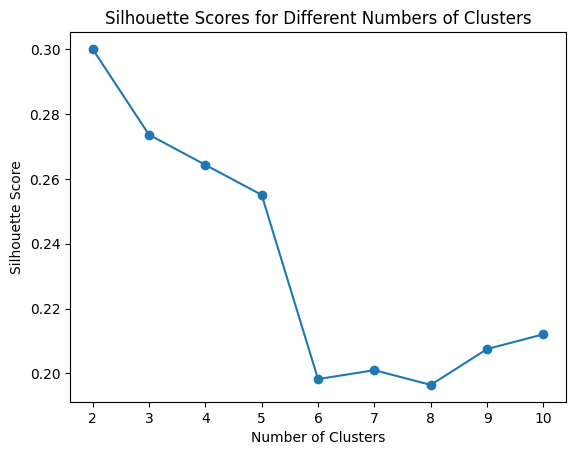

In [ ]:
# 3. Cluster Analysis
# Finding optimal number of clusters using silhouette score
X_scaled = data.select_dtypes(include=np.number)
sil_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

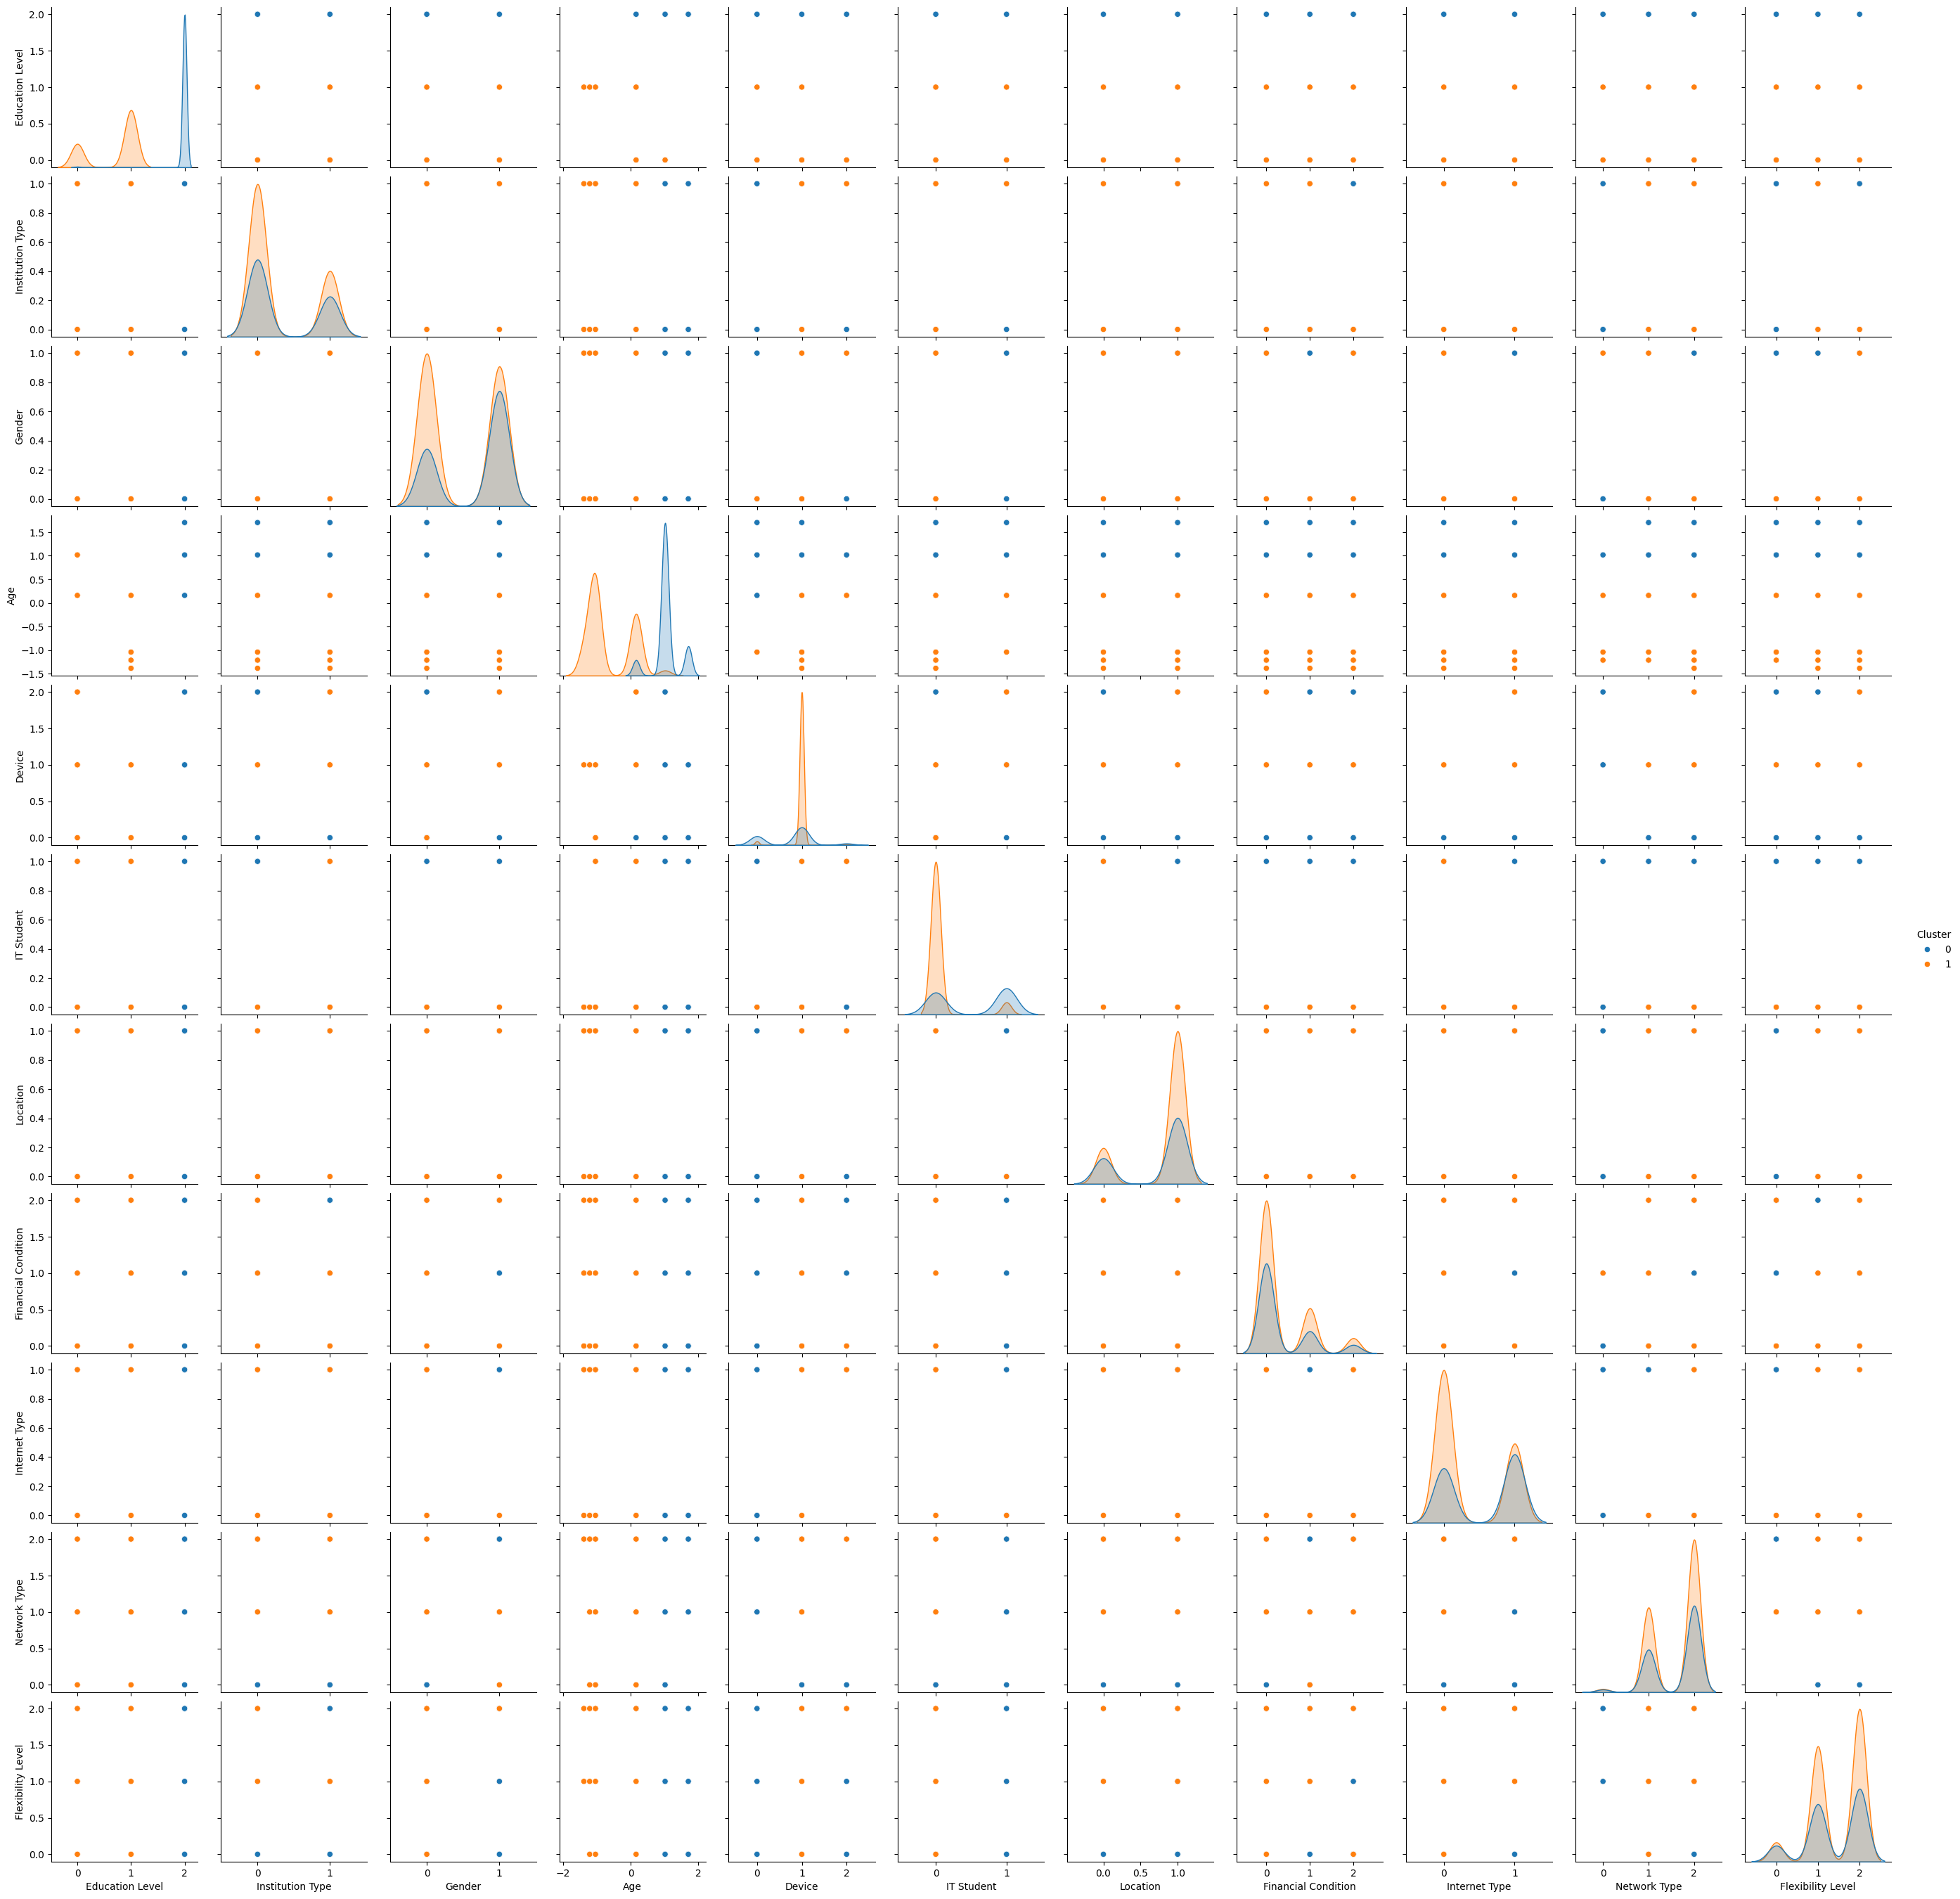


Class Distribution in Flexibility Level:
Flexibility Level
2    51.867220
1    39.834025
0     8.298755
Name: proportion, dtype: float64

New Class Distribution after SMOTE:
Flexibility Level
2    33.333333
1    33.333333
0    33.333333
Name: proportion, dtype: float64


In [ ]:
# 4. Pair Plot
sns.pairplot(data, diag_kind='kde', hue='Cluster')
plt.show()

# 5. Handling Class Imbalance
if target in data.columns:
    print(f"\nClass Distribution in {target}:")
    print(data[target].value_counts(normalize=True) * 100)

    # Resampling if imbalance is detected (optional)
    if data[target].value_counts().min() < 0.2 * len(data):
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        print(f"\nNew Class Distribution after SMOTE:")
        print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# 6.4 Pre-Processing
# Categorical Variables: Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Numeric Variables: Standardizing
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])




PCA Explained Variance:
[0.34489695 0.1335694 ]


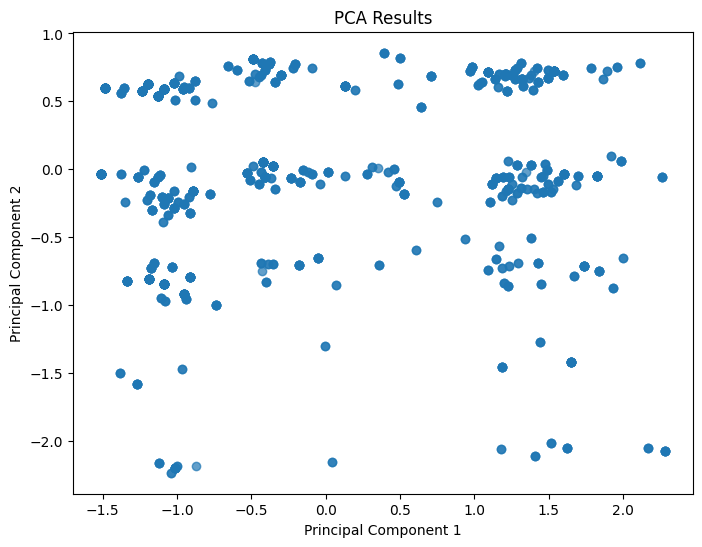

In [ ]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data)
explained_variance = pca.explained_variance_ratio_

print("\nPCA Explained Variance:")
print(explained_variance)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.7)
plt.title("PCA Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()